In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def Read_file(name):
    data=[]
    with open(name) as file:
        for line in file:
            data.append(line.split())

    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = float(data[i][j])

    return data

data = np.array(Read_file("NLS_Group08.txt"))
print(type(data))

A=data[:500]
B=data[500:1000]
C=data[1000:]

A_train, A_test= train_test_split(A,test_size=0.3,shuffle=False)
B_train, B_test= train_test_split(B,test_size=0.3,shuffle=False)
C_train, C_test= train_test_split(C,test_size=0.3,shuffle=False)

<class 'numpy.ndarray'>


In [7]:
print(f'''For Class A \n {pd.DataFrame(A_train).describe()} \n 
       For Class B \n {pd.DataFrame(B_train).describe()} \n 
       For Class C \n {pd.DataFrame(C_train).describe()}''')

For Class A 
                 0           1
count  350.000000  350.000000
mean     1.193500    0.541333
std      0.938366    0.406608
min     -0.365333   -0.295745
25%      0.323768    0.217702
50%      1.282079    0.632074
75%      2.119085    0.883344
max      2.584647    1.197661 
 
       For Class B 
                 0           1
count  350.000000  350.000000
mean     0.027072   -0.848951
std      0.938598    0.433486
min     -1.486585   -1.472881
25%     -0.887060   -1.238432
50%      0.021264   -0.936295
75%      0.975271   -0.479319
max      1.451719   -0.012717 
 
       For Class C 
                 0           1
count  700.000000  700.000000
mean    -0.077242   -0.089857
std      2.927959    3.146111
min     -5.116446   -5.137372
25%     -2.769903   -3.158483
50%     -0.092895   -0.185463
75%      2.685875    3.039403
max      5.145127    5.177807


In [4]:

def Kth_cluster(X_train, mean):
    x_cluster = {}

    for i in range(len(mean)):
        x_cluster[i] = {'mean': mean[i], 'x' : []}

    for i in range(len(X_train)):
        distance = []
        x = X_train[i]

        for j in range(len(mean)):
            d = Distance(x, mean[j])
            distance.append(d)

        cluster = np.argmin(distance)
        x_cluster[cluster]['x'].append(X_train[i])

    return x_cluster

def Update_cluster(X, cluster):
    means = []
    for i in range(len(cluster.keys())):
        x_array = np.array(cluster[i]['x'])
        if x_array.shape[0] > 0:
            updated_mean = x_array.mean(axis=0)
            cluster[i]['mean'] = updated_mean
            means.append(updated_mean)

    cluster = Kth_cluster(X, means)
    return means, cluster

def Distance(x, mean):
    return np.sqrt(np.dot((x - mean),(x - mean).T))

def Distortion(cluster):
    j=0

    for i in range(len(cluster.keys())):
        mean = cluster[i]['mean']

        for x in cluster[i]['x']:
            j += Distance(x, mean)

    return j


def KMean(X, clusters):
    pred = []
    for i in range(len(X)):
        dist = []
        for j in range(k):
            dist.append(Distance(X[i],clusters[j]['mean']))
        pred.append(np.argmin(dist))
    return pred


Iteration 0 
 Means: [array([ 2.271048, -0.207461])] 
 Distortion : 513.8567685865218


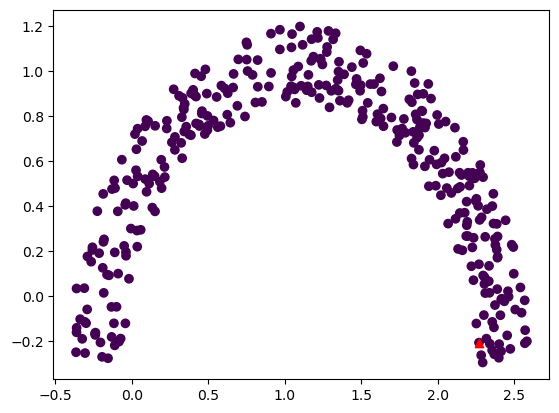

Iteration 1 
 Means: [array([1.19350023, 0.54133341])] 
 Distortion : 334.33783571266207


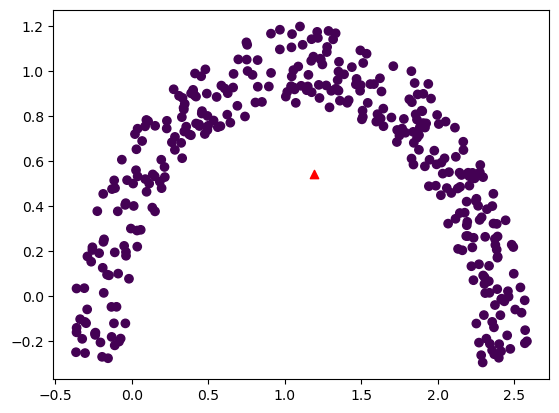

In [5]:
k = 1
X = A_train
np.random.seed(2)
a = np.random.randint(0,len(X),k)

means = list()
for i in a:
    means.append(X[i])
    
cluster = Kth_cluster(X, means)



for i in range(50):
    cluster = Kth_cluster(X, means)
    distortion = Distortion(cluster)
    prediction = KMean(X, cluster)
    print(f'Iteration {i} \n Means: {means} \n Distortion : {distortion}')
    plt.scatter(X[:,0],X[:,1],c = prediction)

    for i in cluster:
        center = cluster[i]['mean']
        plt.scatter(center[0],center[1],marker = '^',c = 'red')
    plt.show()
    
    updated_means, updated_cluster = Update_cluster(X, cluster)
    updated_distortion = Distortion(updated_cluster)
    
    if distortion - updated_distortion < 0.0001 or i>50:
        break
    else:
        means = updated_means
        




Iteration 0 
 Means: [array([-0.137851, -1.16267 ]), array([-0.456049, -1.213578]), array([ 1.427176, -0.147244])] 
 Distortion : 204.74479190125993


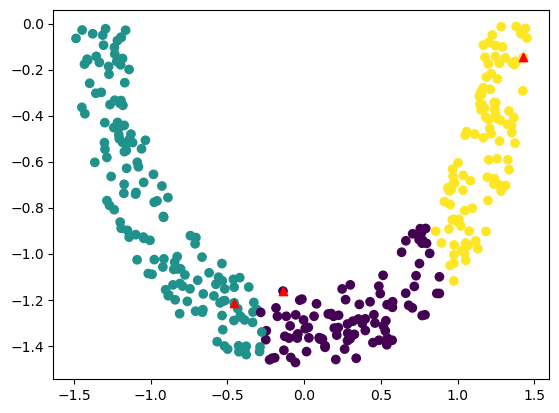

Iteration 1 
 Means: [array([ 0.30741601, -1.25671499]), array([-0.93034086, -0.79860797]), array([ 1.16568142, -0.53121074])] 
 Distortion : 134.40272269566995


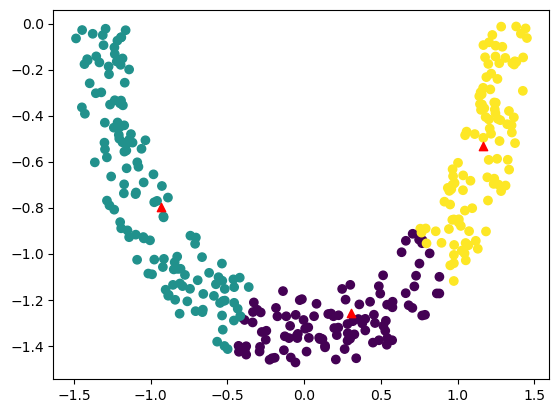

Iteration 2 
 Means: [array([ 0.20422869, -1.28213325]), array([-0.98964912, -0.74141941]), array([ 1.15104459, -0.54555971])] 
 Distortion : 130.75738840619124


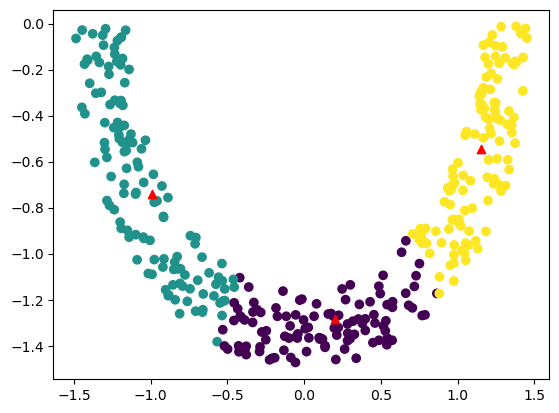

Iteration 3 
 Means: [array([ 0.10790746, -1.29851833]), array([-1.03246038, -0.69957663]), array([ 1.12909226, -0.57389885])] 
 Distortion : 128.29781426067404


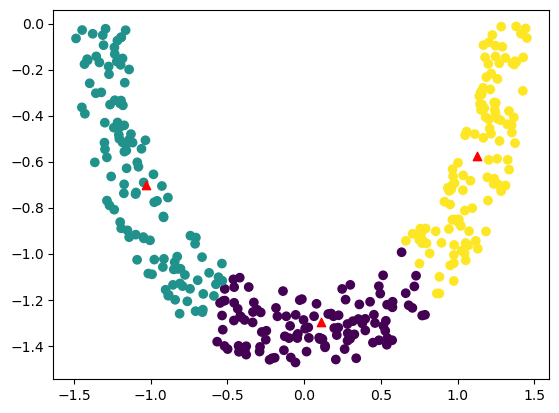

Iteration 4 
 Means: [array([ 0.04801311, -1.29880145]), array([-1.06746255, -0.66492522]), array([ 1.11953625, -0.58629841])] 
 Distortion : 127.1130501330006


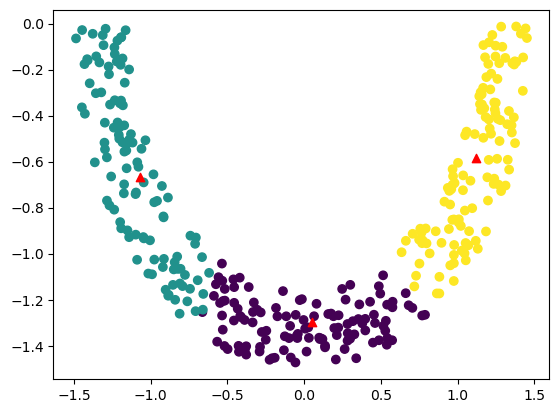

Iteration 5 
 Means: [array([ 2.87310924e-04, -1.29632415e+00]), array([-1.0938182 , -0.63953215]), array([ 1.10881171, -0.59867718])] 
 Distortion : 126.32741541061472


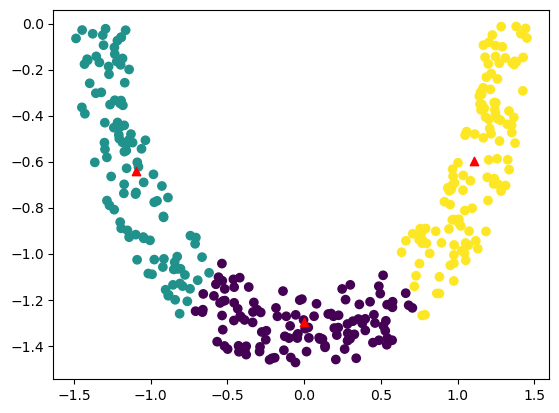

Iteration 6 
 Means: [array([-0.02955936, -1.29496953]), array([-1.10534878, -0.62347978]), array([ 1.10334946, -0.60972827])] 
 Distortion : 126.06049814718244


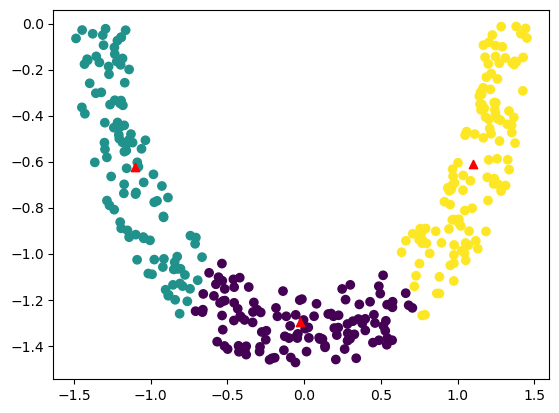

Iteration 7 
 Means: [array([-0.03443349, -1.29322008]), array([-1.10984896, -0.61922231]), array([ 1.10334946, -0.60972827])] 
 Distortion : 126.02694595628206


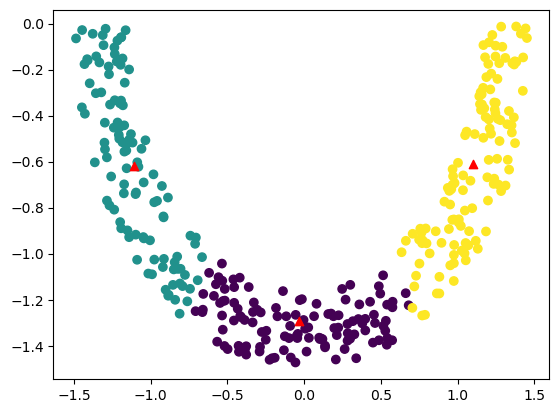

Iteration 8 
 Means: [array([-0.04059723, -1.29370011]), array([-1.10984896, -0.61922231]), array([ 1.10008607, -0.61485851])] 
 Distortion : 126.01970670818531


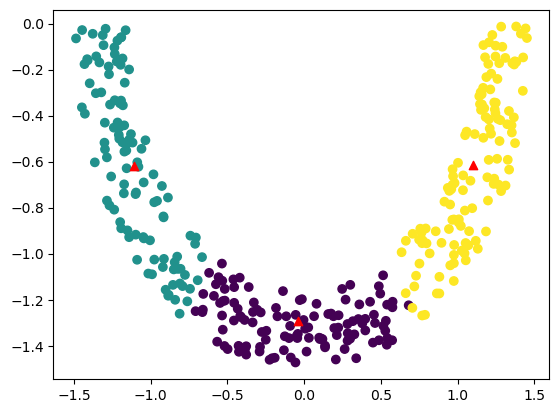

Iteration 9 
 Means: [array([-0.04650036, -1.29472444]), array([-1.10984896, -0.61922231]), array([ 1.09652338, -0.61938653])] 
 Distortion : 126.01327183268715


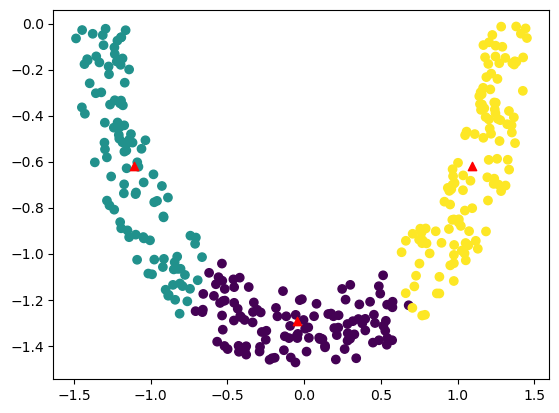

In [33]:
k = 3
X = A_train
np.random.seed(2)
a = np.random.randint(0,len(X),k)

means = list()
for i in a:
    means.append(X[i])
    
cluster = Kth_cluster(X, means)



for i in range(50):
    cluster = Kth_cluster(X, means)
    distortion = Distortion(cluster)
    prediction = KMean(X, cluster)
    print(f'Iteration {i} \n Means: {means} \n Distortion : {distortion}')
    plt.scatter(X[:,0],X[:,1],c = prediction)

    for i in cluster:
        center = cluster[i]['mean']
        plt.scatter(center[0],center[1],marker = '^',c = 'red')
    plt.show()
    
    updated_means, updated_cluster = Update_cluster(X, cluster)
    updated_distortion = Distortion(updated_cluster)
    
    if distortion - updated_distortion < 0.0001 or i>50:
        break
    else:
        means = updated_means
        




Iteration 0 
 Means: [array([-0.137851, -1.16267 ]), array([-0.456049, -1.213578]), array([ 1.427176, -0.147244])] 
 Distortion : 204.74479190125993


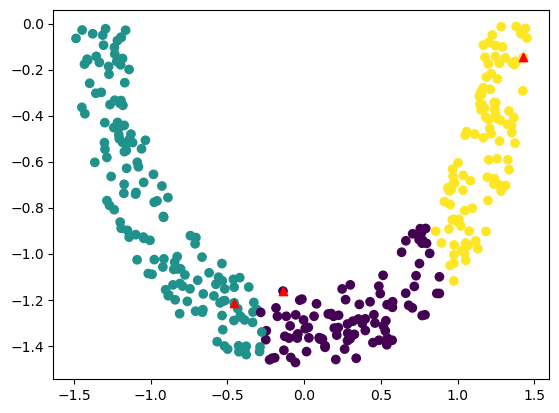

Iteration 1 
 Means: [array([ 0.30741601, -1.25671499]), array([-0.93034086, -0.79860797]), array([ 1.16568142, -0.53121074])] 
 Distortion : 134.40272269566995


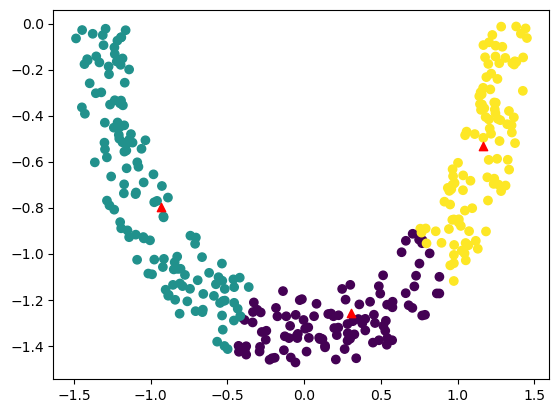

Iteration 2 
 Means: [array([ 0.20422869, -1.28213325]), array([-0.98964912, -0.74141941]), array([ 1.15104459, -0.54555971])] 
 Distortion : 130.75738840619124


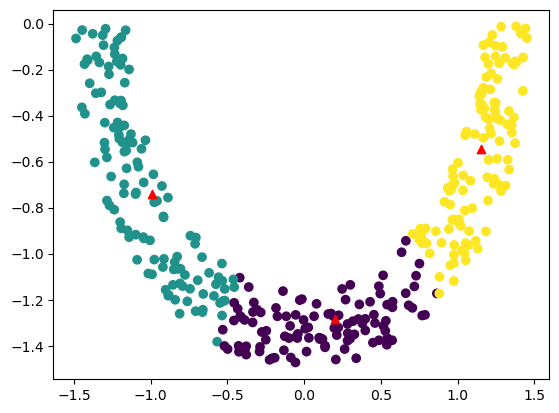

Iteration 3 
 Means: [array([ 0.10790746, -1.29851833]), array([-1.03246038, -0.69957663]), array([ 1.12909226, -0.57389885])] 
 Distortion : 128.29781426067404


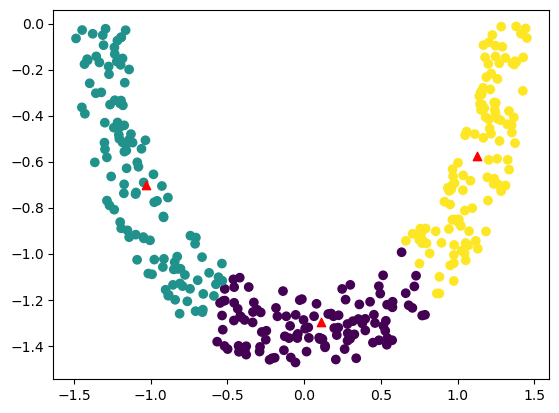

Iteration 4 
 Means: [array([ 0.04801311, -1.29880145]), array([-1.06746255, -0.66492522]), array([ 1.11953625, -0.58629841])] 
 Distortion : 127.1130501330006


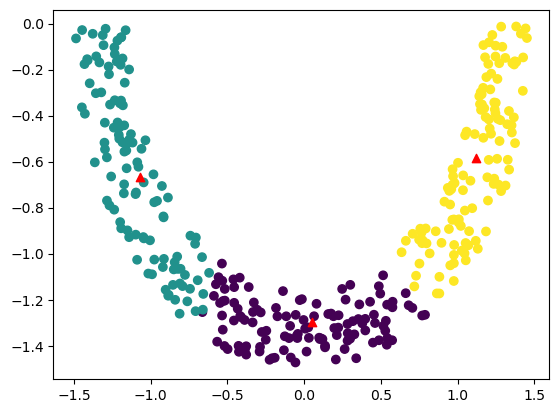

Iteration 5 
 Means: [array([ 2.87310924e-04, -1.29632415e+00]), array([-1.0938182 , -0.63953215]), array([ 1.10881171, -0.59867718])] 
 Distortion : 126.32741541061472


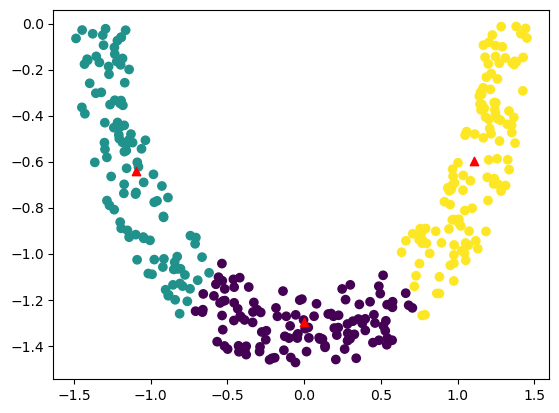

Iteration 6 
 Means: [array([-0.02955936, -1.29496953]), array([-1.10534878, -0.62347978]), array([ 1.10334946, -0.60972827])] 
 Distortion : 126.06049814718244


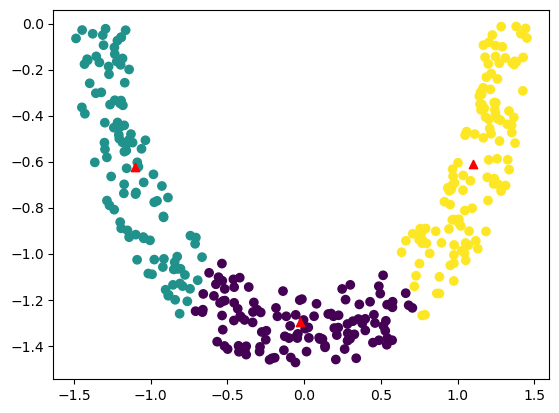

Iteration 7 
 Means: [array([-0.03443349, -1.29322008]), array([-1.10984896, -0.61922231]), array([ 1.10334946, -0.60972827])] 
 Distortion : 126.02694595628206


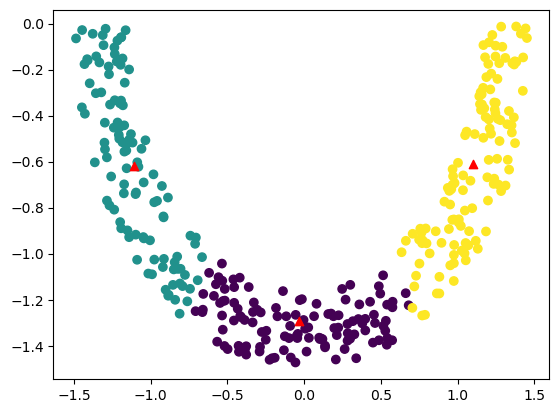

Iteration 8 
 Means: [array([-0.04059723, -1.29370011]), array([-1.10984896, -0.61922231]), array([ 1.10008607, -0.61485851])] 
 Distortion : 126.01970670818531


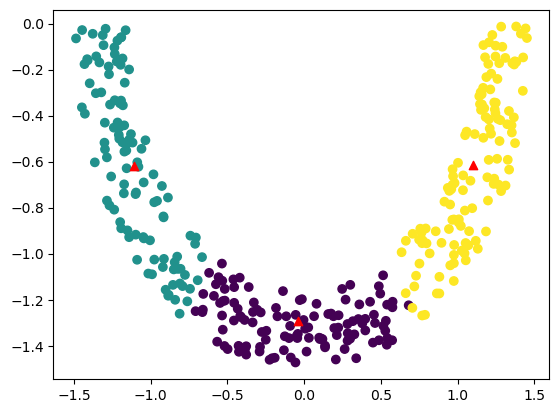

Iteration 9 
 Means: [array([-0.04650036, -1.29472444]), array([-1.10984896, -0.61922231]), array([ 1.09652338, -0.61938653])] 
 Distortion : 126.01327183268715


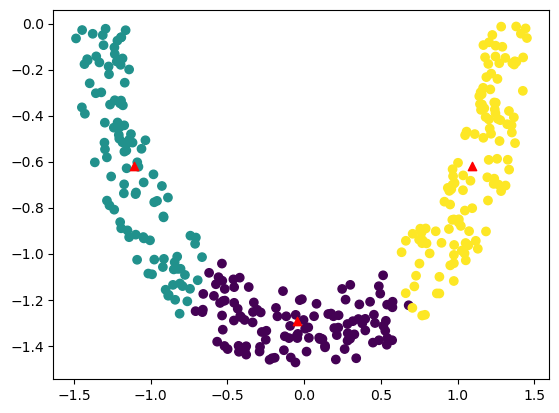

In [42]:
k = 3
X = B_train
np.random.seed(2)
a = np.random.randint(0,len(X),k)

means = list()
for i in a:
    means.append(X[i])
    
cluster = Kth_cluster(X, means)



for i in range(50):
    cluster = Kth_cluster(X, means)
    distortion = Distortion(cluster)
    prediction = KMean(X, cluster)
    print(f'Iteration {i} \n Means: {means} \n Distortion : {distortion}')
    plt.scatter(X[:,0],X[:,1],c = prediction)

    for i in cluster:
        center = cluster[i]['mean']
        plt.scatter(center[0],center[1],marker = '^',c = 'red')
    plt.show()
    
    updated_means, updated_cluster = Update_cluster(X, cluster)
    updated_distortion = Distortion(updated_cluster)
    
    if distortion - updated_distortion < 0.0001 or i>50:
        break
    else:
        means = updated_means
        




Iteration 0 
 Means: [array([-3.815278,  1.716366]), array([-2.315856,  3.780705]), array([ 3.003282, -1.515918])] 
 Distortion : 1981.6106331658445


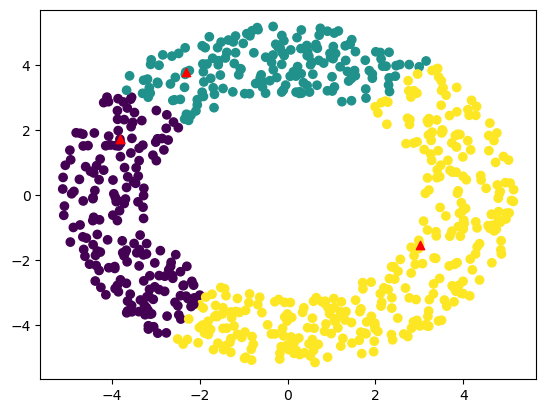

Iteration 1 
 Means: [array([-3.61181466, -0.79365151]), array([-0.3645785 ,  3.87880392]), array([ 2.09960908, -1.81485814])] 
 Distortion : 1615.4123669389737


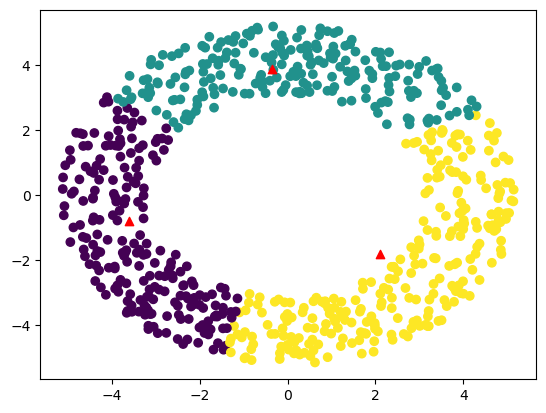

Iteration 2 
 Means: [array([-3.31958118, -1.41360817]), array([0.09125849, 3.6807292 ]), array([ 2.46607423, -2.17399914])] 
 Distortion : 1546.7265609027015


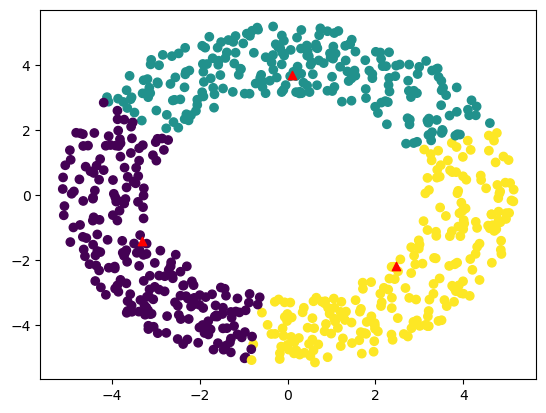

Iteration 3 
 Means: [array([-3.13987676, -1.71849699]), array([0.21220081, 3.54176317]), array([ 2.65421636, -2.29647376])] 
 Distortion : 1532.0081560672552


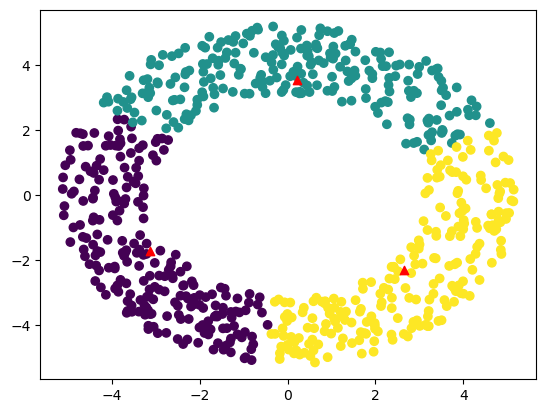

Iteration 4 
 Means: [array([-3.08711706, -1.81972209]), array([0.18873557, 3.51326311]), array([ 2.70652937, -2.29446082])] 
 Distortion : 1529.8566260245943


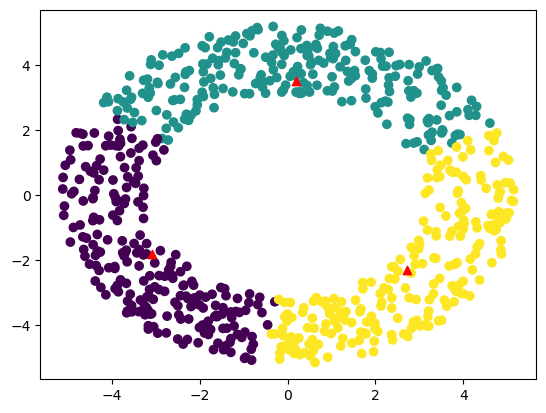

Iteration 5 
 Means: [array([-3.07466346, -1.87550659]), array([0.14930082, 3.49410112]), array([ 2.71997247, -2.2900667 ])] 
 Distortion : 1528.725726971845


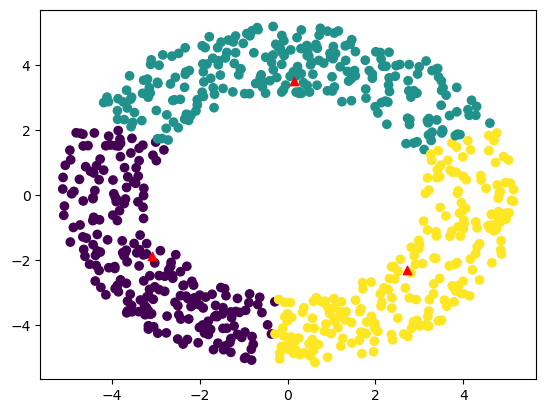

Iteration 6 
 Means: [array([-3.05745464, -1.93850135]), array([0.09205429, 3.48445931]), array([ 2.73838598, -2.26376922])] 
 Distortion : 1527.7118645243622


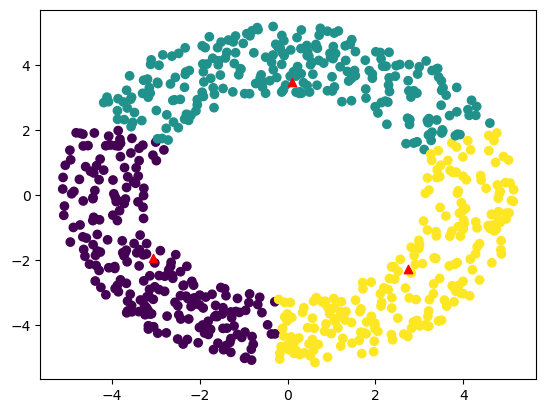

Iteration 7 
 Means: [array([-3.04518766, -1.94877218]), array([0.09205429, 3.48445931]), array([ 2.75200536, -2.2547785 ])] 
 Distortion : 1527.6094160001096


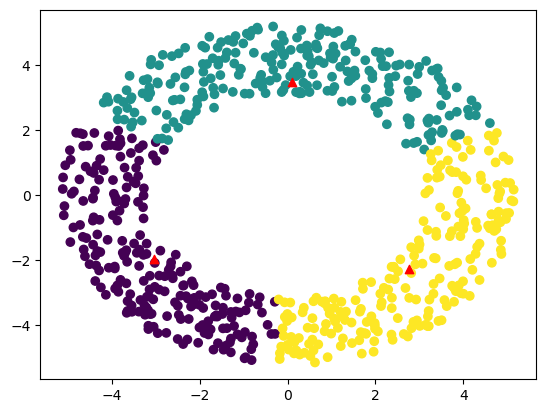

In [43]:
k = 3
X = C_train
np.random.seed(2)
a = np.random.randint(0,len(X),k)

means = list()
for i in a:
    means.append(X[i])
    
cluster = Kth_cluster(X, means)



for i in range(50):
    cluster = Kth_cluster(X, means)
    distortion = Distortion(cluster)
    prediction = KMean(X, cluster)
    print(f'Iteration {i} \n Means: {means} \n Distortion : {distortion}')
    plt.scatter(X[:,0],X[:,1],c = prediction)

    for i in cluster:
        center = cluster[i]['mean']
        plt.scatter(center[0],center[1],marker = '^',c = 'red')
    plt.show()
    
    updated_means, updated_cluster = Update_cluster(X, cluster)
    updated_distortion = Distortion(updated_cluster)
    
    if distortion - updated_distortion < 0.0001 or i>50:
        break
    else:
        means = updated_means
        


